<a href="https://colab.research.google.com/github/Samira1356/new-repo/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
# loading the dataset
Dataset1 = pd.read_csv('/content/customers.csv')

In [42]:
Dataset1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
Dataset1.shape

(200, 5)

In [45]:
Dataset1.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0



# Select two columns here, Age and Spending scores

In [58]:
#Dataset2 = Dataset1[['Age', 'Spending Score (1-100)']]
# # remove the customer ID and Gender
Dataset2 = Dataset1.drop(['CustomerID', 'Gender'], axis = 1)

In [59]:
Dataset2.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [60]:
# scale the data
from sklearn.preprocessing import StandardScaler

In [61]:
# scale the Dataset2
sc = StandardScaler()
Dataset2 = sc.fit_transform(Dataset2)

In [64]:
Dataset2 = pd.DataFrame(Dataset2)

In [65]:
Dataset2.head()

,0,1,2
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [66]:
# assign back the column name to the scaled Dataset2
Dataset2.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [67]:
Dataset2.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [ ]:
# determine the number of clusters using Elbow curve
from sklearn.cluster import KMeans

In [68]:
WCSS = [] # whithin cluster sum square

In [69]:
for i in range(1, 11):
  Model1 = KMeans(n_clusters = i)
  Model1.fit(Dataset2)
  WCSS.append(Model1.inertia_)

In [70]:
WCSS

[599.9999999999999,
 453.6241091674958,
 295.4562449213557,
 205.22514747675913,
 168.2475801755683,
 146.90033964414346,
 117.13060763524544,
 112.30118958377544,
 97.00686024693968,
 85.85701198115986]

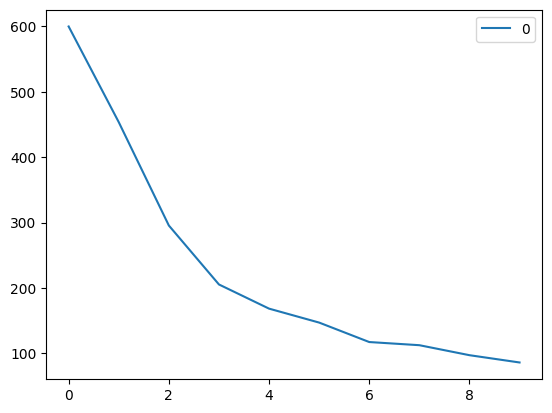

In [72]:
pd.DataFrame(WCSS).plot()
plt.show()

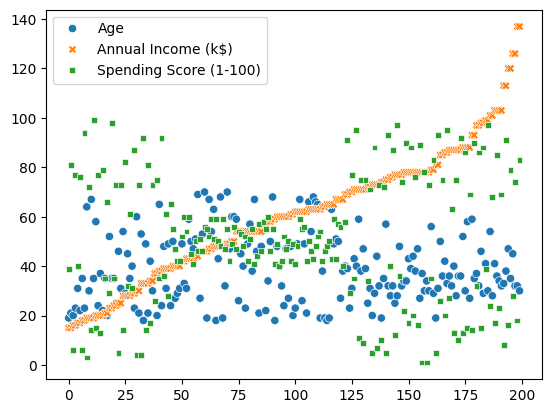

In [23]:
# visual the data
sns.scatterplot(Dataset2 )#x = Dataset1, y = Dataset1['Spending Score (1-100)'])
plt.show()



# Elblo Curve
### It will tell you the perfect number of clusters

In [24]:
from sklearn.cluster import KMeans

In [25]:
Error = []

In [26]:
for i in range(1, 11):
  Model1 = KMeans(n_clusters = i)
  Model1.fit(Dataset2)
  Error.append(Model1.inertia_)

In [27]:
Error

[308812.7800000001,
 212840.16982097193,
 158518.3942791626,
 105251.10813220503,
 82608.63809385581,
 58300.443321590676,
 51426.14664502165,
 44309.83640371743,
 44321.0779588077,
 42365.0757319995]

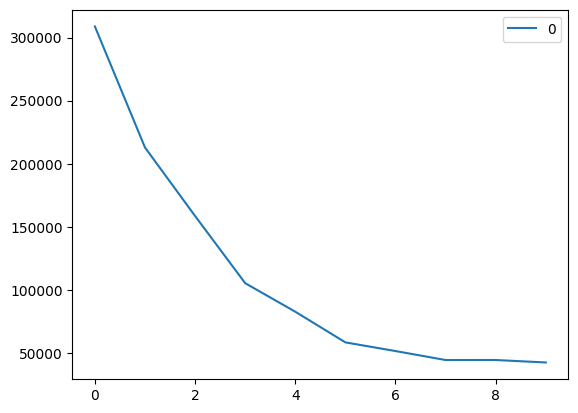

In [28]:
pd.DataFrame(Error).plot()
plt.show()

In [73]:
Model2 = KMeans(n_clusters = 5)
Model2.fit(Dataset2)

KMeans(n_clusters=5)

In [74]:
clusters = Model2.labels_
clusters

array([0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 4, 0, 0, 0, 4, 0, 0, 1, 4, 4, 4, 1, 0, 4, 1, 0, 1, 1, 1, 0,
       4, 1, 0, 0, 1, 4, 1, 1, 1, 0, 4, 4, 0, 4, 1, 4, 1, 4, 0, 4, 1, 0,
       0, 4, 1, 0, 4, 4, 4, 0, 4, 0, 4, 0, 0, 4, 1, 0, 4, 0, 1, 1, 1, 1,
       1, 0, 4, 0, 0, 0, 1, 4, 4, 4, 0, 4, 4, 3, 2, 3, 4, 3, 1, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [29]:
# Note--> k = 3
# Now we will again apply K means only for k = 3
# in multiclass case the k = 5

In [30]:
Model2 = KMeans(n_clusters = 5)
Model2.fit(Dataset2)


KMeans(n_clusters=5)

In [31]:
# to see the cluster name
clusters = Model2.labels_
clusters

array([0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 3, 4, 3, 4,
       1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4], dtype=int32)

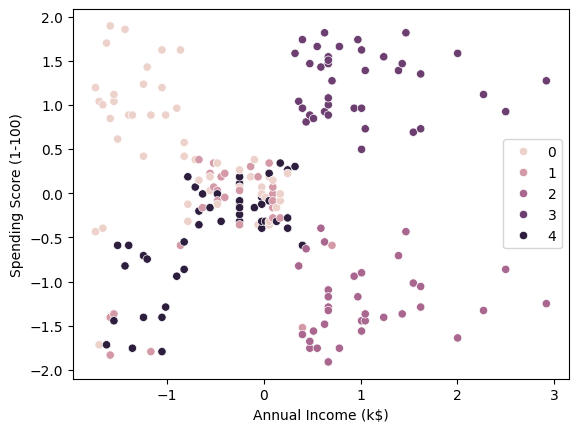

In [75]:
# show the clusters in scatter plots
sns.scatterplot(x = Dataset2['Annual Income (k$)'], y = Dataset2['Spending Score (1-100)'], hue = clusters)
plt.show()

In [37]:
Dataset2.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

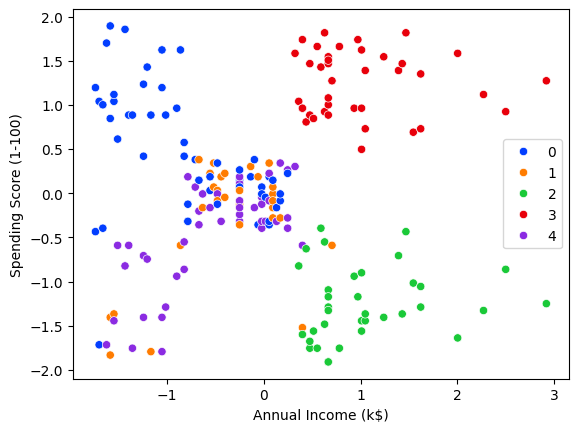

In [77]:
# show the clusters for agem and Annual Inclme
sns.scatterplot(x = Dataset2['Annual Income (k$)'], y = Dataset2['Spending Score (1-100)'], hue = clusters, palette='bright' )
plt.show()

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


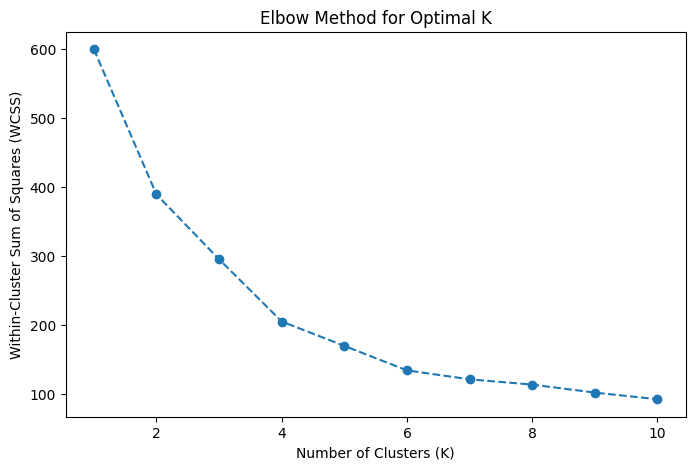

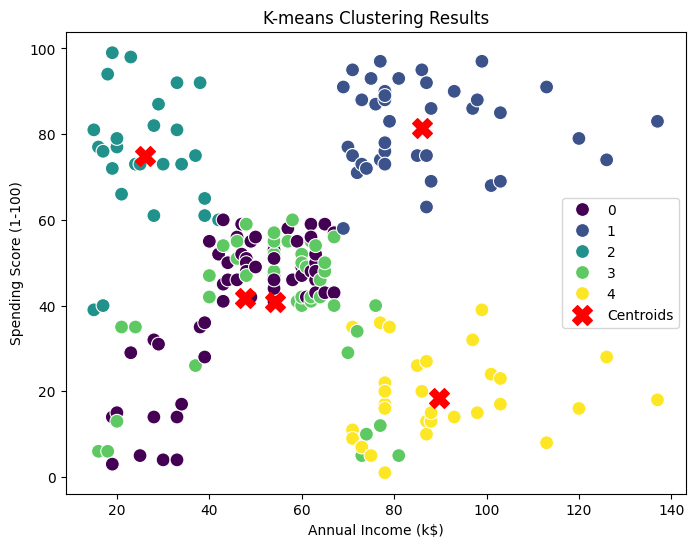

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the data
# Assuming the CSV is saved as 'customer_data.csv'
data = pd.read_csv('/content/customers.csv')

# Display the first few rows of the data
print(data.head())

# Step 2: Preprocess the data
# Selecting relevant features for clustering (ignoring 'Customer ID' and categorical 'Gender')
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data to ensure all features contribute equally to the clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Step 4: Train the K-means model with optimal K (assume K=5 based on elbow plot)
optimal_k = 5  # Replace this with the value you identify from the elbow curve
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Visualize the clusters using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['Cluster'],
    palette='viridis',
    s=100,
    legend='full'
)
plt.scatter(
    kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],  # Rescale the centroids
    kmeans.cluster_centers_[:, 2] * scaler.scale_[2] + scaler.mean_[2],  # Rescale the centroids
    s=200, c='red', marker='X', label='Centroids'
)
plt.title('K-means Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


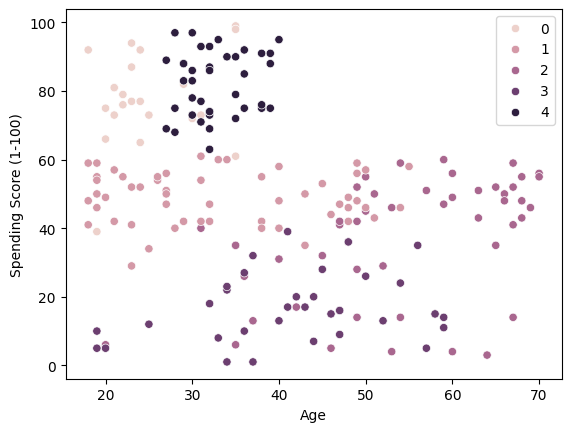

In [34]:
sns.scatterplot(x = Dataset2['Age', y = Dataset2['Spending Score (1-100)'], hue = clusters)
plt.show()

In [36]:
#sns.scatterplot(x = Dataset2, y = Dataset2['Spending Score (1-100)'], hue = clusters)
# show the cluster for entire Dataset2
sns.scatterplot(x = Dataset2['Age'], y = Dataset2['Spending Score (1-100)'], hue = clusters, palette = 'rainbow')

plt.show()

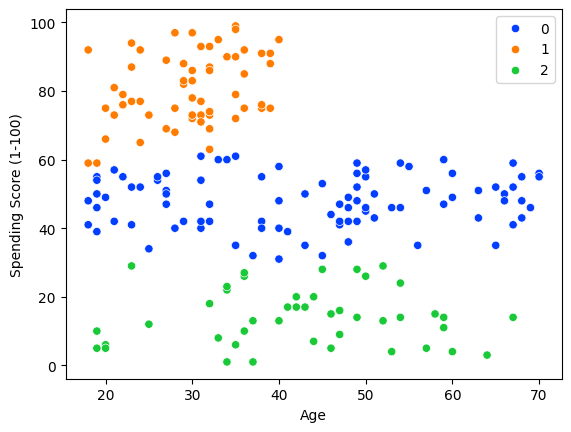

In [30]:
sns.scatterplot(x = Dataset2['Age'], y = Dataset2['Spending Score (1-100)'], hue = clusters, palette = 'bright')
plt.show()

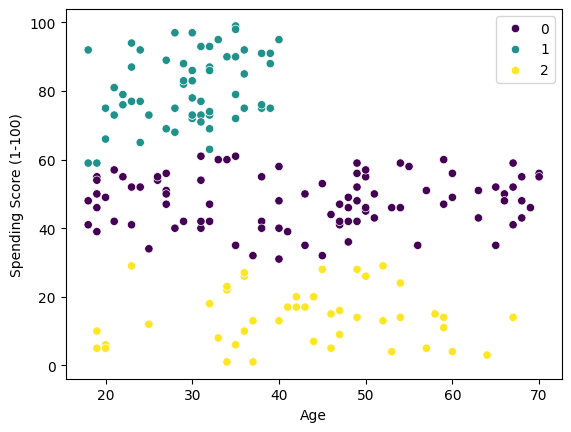

In [31]:
sns.scatterplot(x = Dataset2['Age'], y = Dataset2['Spending Score (1-100)'], hue = clusters, palette = 'viridis')
plt.show()